In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("noisy_data.csv")
df.head(10)

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


# Handling Missing Values

In [4]:
df.isna().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

## To impute Age

Relation of age with Region
        count  mean        std   min    25%   50%    75%   max
Region                                                        
Brazil    2.0  37.5   7.778175  32.0  34.75  37.5  40.25  43.0
India     4.0  46.0   6.055301  40.0  41.50  45.5  50.00  53.0
USA       3.0  45.0  10.000000  35.0  40.00  45.0  50.00  55.0


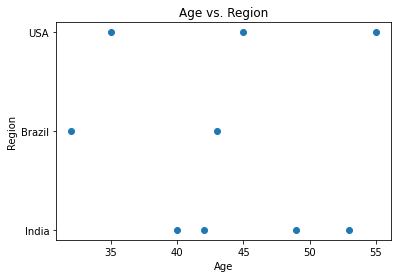




Relation of age with Online Shopper
                count  mean       std   min   25%   50%   75%   max
Online Shopper                                                     
No                4.0  45.5  8.544004  35.0  41.0  46.0  50.5  55.0
Yes               5.0  42.4  7.635444  32.0  40.0  42.0  45.0  53.0


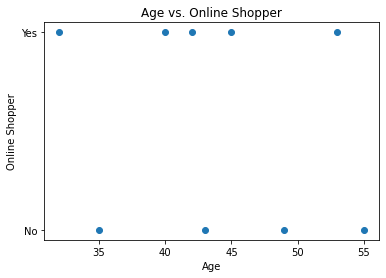

In [5]:
# checking for any relation of Age with other features (except Income)
for col in ['Region', 'Online Shopper']:
  print(f"Relation of age with {col}")
  print(df.groupby(col).Age.describe())
  plt.scatter(df.Age, df[col])
  plt.xlabel('Age')
  plt.ylabel(col)
  plt.title(f"Age vs. {col}")
  plt.show()
  print('\n\n')

From the above information and the scatter plots, we can see that there is not much dependency between Age with Region or with Online Shopper.

Hence the missing value in Age can be imputed with the column mean.

In [6]:
df.Age.fillna(round(df.Age.mean()), inplace=True)
df.isna().sum()

Region            0
Age               0
Income            1
Online Shopper    0
dtype: int64

## To impute Income


Relation of Income with Region
        count     mean           std      min      25%      50%      75%  \
Region                                                                     
Brazil    3.0  64400.0   7989.993742  57600.0  60000.0  62400.0  67800.0   
India     4.0  82800.0  10598.113040  69600.0  77700.0  83400.0  88500.0   
USA       2.0  82200.0  24607.315985  64800.0  73500.0  82200.0  90900.0   

            max  
Region           
Brazil  73200.0  
India   94800.0  
USA     99600.0  


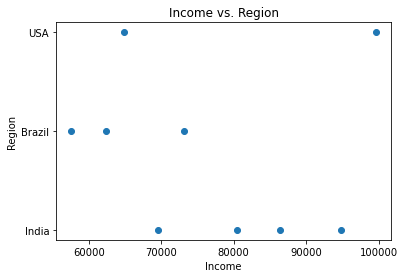




Relation of Income with Online Shopper
                count     mean           std      min      25%      50%  \
Online Shopper                                                            
No                5.0  77280.0  15613.840015  62400.0  64800.0  73200.0   
Yes               4.0  75600.0  15829.087150  57600.0  66600.0  75000.0   

                    75%      max  
Online Shopper                    
No              86400.0  99600.0  
Yes             84000.0  94800.0  


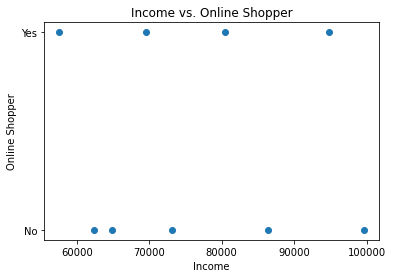




Relation of Income with Age
      count     mean  std      min      25%      50%      75%      max
Age                                                                   
32.0    1.0  57600.0  NaN  57600.0  57600.0  57600.0  57600.0  57600.0
35.0    1.0  64800.0  NaN  64800.0  64800.0  64800.0  64800.0  64800.0
40.0    1.0  69600.0  NaN  69600.0  69600.0  69600.0  69600.0  69600.0
42.0    1.0  80400.0  NaN  80400.0  80400.0  80400.0  80400.0  80400.0
43.0    1.0  73200.0  NaN  73200.0  73200.0  73200.0  73200.0  73200.0
44.0    1.0  62400.0  NaN  62400.0  62400.0  62400.0  62400.0  62400.0
45.0    0.0      NaN  NaN      NaN      NaN      NaN      NaN      NaN
49.0    1.0  86400.0  NaN  86400.0  86400.0  86400.0  86400.0  86400.0
53.0    1.0  94800.0  NaN  94800.0  94800.0  94800.0  94800.0  94800.0
55.0    1.0  99600.0  NaN  99600.0  99600.0  99600.0  99600.0  99600.0


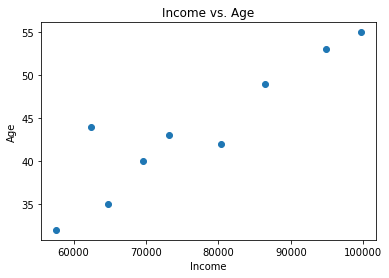

In [7]:
# checking for any relation of Income with other features
for col in ['Region', 'Online Shopper', 'Age']:
  print(f"Relation of Income with {col}")
  print(df.groupby(col).Income.describe())
  plt.scatter(df.Income, df[col])
  plt.xlabel('Income')
  plt.ylabel(col)
  plt.title(f"Income vs. {col}")
  plt.show()
  print('\n\n')

             Age    Income
Age     1.000000  0.910607
Income  0.910607  1.000000


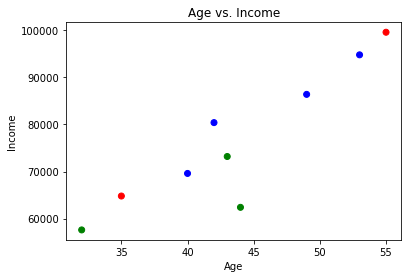

In [8]:
# to find more details on the correlation of Income with Age
print(df.corr())
plt.scatter(df.Age, df.Income, c=df['Region'].map({'Brazil':'green', 'India':'blue', 'USA': 'red'}))
plt.xlabel('Age')
plt.ylabel('Income')
plt.title(f"Age vs. Income")
plt.show()

From the above graphs and values, we can see that Region and Online Shopper columns have no much impact on the Income. But Age and Income seem to be highly correlated.

The scatter plot between Age & Income shows a linear relationship as well. We can try to fit a linear regression model using the Age data to predict the Income.

In [9]:
df_wo_na = df.dropna().reset_index(drop=True) # fetching the data with non-null Income for modeling
df_wo_na.head(10)

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,India,40.0,69600.0,Yes
5,Brazil,44.0,62400.0,No
6,India,53.0,94800.0,Yes
7,USA,55.0,99600.0,No
8,India,42.0,80400.0,Yes


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_wo_na.Age, df_wo_na.Income, train_size=0.8, random_state=17)

lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1, 1), y_train)

lr.score(np.array(X_train).reshape(-1, 1), y_train)

0.8252376533528509

In [11]:
# Checking the predicted and true Incomes on the training data (since the data is small, manually inspecting)
print(lr.predict(np.array(X_train).reshape(-1, 1)))
print(np.array(y_train))

[61900.8782936  77504.64240903 86173.40025094 74037.13927227
 93108.40652447 96575.90966123 56699.62358846]
[64800. 62400. 86400. 80400. 94800. 99600. 57600.]


In [12]:
# Checking the predicted and true Incomes on the test data (since the data is small, manually inspecting)
print(lr.predict(np.array(X_test).reshape(-1, 1)))
print(np.array(y_test))

[70569.63613551 75770.89084065]
[69600. 73200.]


Even though not perfect, the model seems to be okay, given how small the data is.

In [13]:
# checking some regression metrics of the model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# training data
y_pred_train = lr.predict(np.array(X_train).reshape(-1, 1))
rmse = round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 3)
mae = round(mean_absolute_error(y_train, y_pred_train), 3)
r2 = round(r2_score(y_train, y_pred_train), 3)
print(f"Training Metrics:: RMSE: {rmse}; MAE: {mae}; R-squared: {r2}")

# test data
y_pred_test = lr.predict(np.array(X_test).reshape(-1, 1))
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 3)
mae = round(mean_absolute_error(y_test, y_pred_test), 3)
r2 = round(r2_score(y_test, y_pred_test), 3)
print(f"Testing Metrics:: RMSE: {rmse}; MAE: {mae}; R-squared: {r2}")

Training Metrics:: RMSE: 6435.502; MAE: 4315.612; R-squared: 0.825
Testing Metrics:: RMSE: 1942.894; MAE: 1770.263; R-squared: -0.165


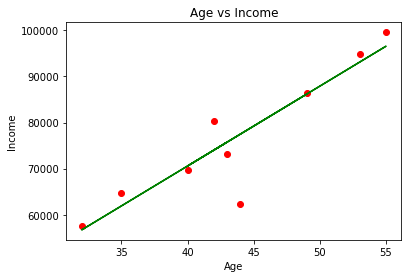

In [14]:
# Visualising the linear model
plt.scatter(df_wo_na.Age, df_wo_na.Income, color = "red")
plt.plot(df_wo_na.Age, lr.predict(np.array(df_wo_na.Age).reshape(-1, 1)), color = "green")
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

This seems to serve our purpose.

In [15]:
# Predicted value for the missing Income
lr.predict(np.array(df[df.Income.isna()].Age).reshape(-1, 1))[0]

79238.39397741531

In [16]:
# Imputing the missing values in Income with the predicted values
df["Income"] = np.where(df.Income.isna(), lr.predict(np.array(df.Age).reshape(-1, 1)), df.Income)
df.head(10)

,Region,Age,Income,Online Shopper
0,India,49.0,86400.000000,No
1,Brazil,32.0,57600.000000,Yes
2,USA,35.0,64800.000000,No
3,Brazil,43.0,73200.000000,No
4,USA,45.0,79238.393977,Yes
5,India,40.0,69600.000000,Yes
6,Brazil,44.0,62400.000000,No
7,India,53.0,94800.000000,Yes
8,USA,55.0,99600.000000,No
9,India,42.0,80400.000000,Yes


# Normality Tests

*Reference: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/*

In [17]:
num_cols = ['Age', 'Income']

## Visualisation

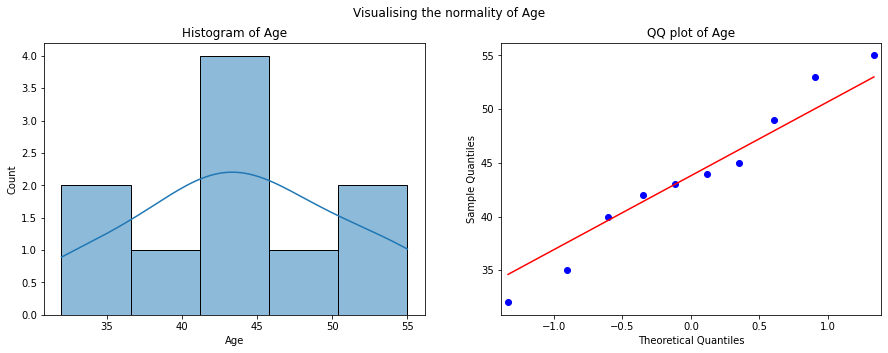

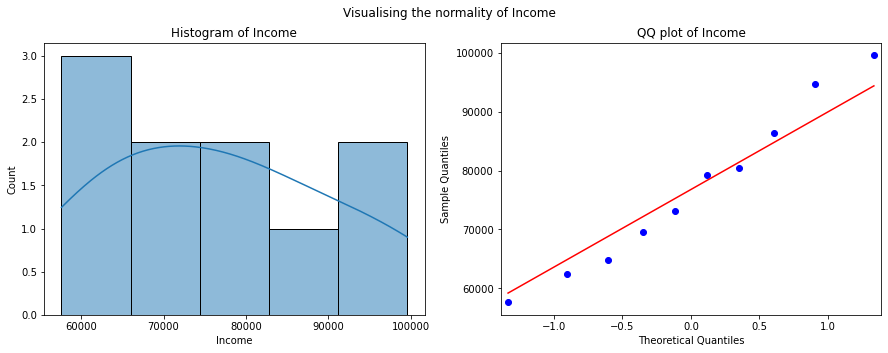

In [18]:
# Checking normality using visualisation
from statsmodels.graphics.gofplots import qqplot

for col in num_cols:
  
  # creating subplots
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  fig.suptitle(f'Visualising the normality of {col}')
  
  # histogram
  sns.histplot(ax=axes[0], x=df[col], kde=True)
  axes[0].set_title(f"Histogram of {col}")

  # qq-plot
  qqplot(ax=axes[1], data=df[col], line='s')
  axes[1].set_title(f"QQ plot of {col}")

  plt.show()

From the above visualisations, both the Age & Income columns seem to be likely Gaussian.

## Statistical Tests

Statistical tests are done by assuming a hypothesis (namely, the null hypothesis or H0). If the p-statistic obtained from the test calculations are less than or equal to a threshold (theta), then we can reject the hypothesis. Otherwise, i.e., if the p-statistic is greater than theta, then we fail to reject the null hypothesis.

The threshold, theta, is typically taken to be 0.05 (5%). 

In [19]:
theta = 0.05 # threshold for the tests' p-values

In our case, the assumption is that the data (column values) was drawn from a normal (Gaussian) distribution. The null hypotheses, for each of the numercial columns, are as follows:

***Age***

*H0_Age: The data from the column Age was drawn from a normal distribution.*

* If p_Age <= 0.05, then reject H0_Age, i.e., Age data is not normal.
* Else, we fail to reject H0_Age, i.e., fail to conclude that Age data is not normal.

***Income***

*H0_Income: The data from the column Income was drawn from a normal distribution.*

* If p_Income <= 0.05, then reject H0_Income, i.e., Income data is not normal.
* Else, we fail to reject H0_Income, i.e., fail to conclude that Income data is not normal.

We will perform some types of normality tests and see the statistics.

### Shapiro-Wilk test

In [20]:
from scipy.stats import shapiro

for col in num_cols:
  print(f"Running test for {col}")
  stats, p = shapiro(df[col])
  print(f"Statistics={round(stats, 3)}, p_{col}={round(p, 3)}")
  if p <= theta:
    print(f"Shapiro-Wilk test rejects the null hypothesis for {col}. The data from the column {col} is not normal.")
  else:
    print(f"Shapiro-Wilk test failed to reject the null hypothesis for {col}. The data from the column {col} seems normal.")
  print()

Running test for Age
Statistics=0.972, p_Age=0.908
Shapiro-Wilk test failed to reject the null hypothesis for Age. The data from the column Age seems normal.

Running test for Income
Statistics=0.964, p_Income=0.831
Shapiro-Wilk test failed to reject the null hypothesis for Income. The data from the column Income seems normal.



### Chi-square test

In [21]:
from scipy.stats import chisquare

for col in num_cols:
  print(f"Running test for {col}")
  stats, p = chisquare(df[col])
  print(f"Statistics={round(stats, 3)}, p_{col}={round(p, 3)}")
  if p <= theta:
    print(f"Chi-square test rejects the null hypothesis for {col}. The data from the column {col} is not normal.")
  else:
    print(f"Chi-square test failed to reject the null hypothesis for {col}. The data from the column {col} seems normal.")
  print()

Running test for Age
Statistics=10.813, p_Age=0.289
Chi-square test failed to reject the null hypothesis for Age. The data from the column Age seems normal.

Running test for Income
Statistics=22651.285, p_Income=0.0
Chi-square test rejects the null hypothesis for Income. The data from the column Income is not normal.



### Lilliefors test

In [22]:
from statsmodels.stats.diagnostic import lilliefors

for col in num_cols:
  print(f"Running test for {col}")
  stats, p = lilliefors(df[col])
  print(f"Statistics={round(stats, 3)}, p_{col}={round(p, 3)}")
  if p <= theta:
    print(f"Lilliefors test rejects the null hypothesis for {col}. The data from the column {col} is not normal.")
  else:
    print(f"Lilliefors test failed to reject the null hypothesis for {col}. The data from the column {col} seems normal.")
  print()

Running test for Age
Statistics=0.134, p_Age=0.872
Lilliefors test failed to reject the null hypothesis for Age. The data from the column Age seems normal.

Running test for Income
Statistics=0.106, p_Income=0.987
Lilliefors test failed to reject the null hypothesis for Income. The data from the column Income seems normal.



### Kolmogorov-Smirnov test

In [23]:
from scipy.stats import kstest

for col in num_cols:
  print(f"Running test for {col}")
  stats, p = kstest(df[col], "norm")
  print(f"Statistics={round(stats, 3)}, p_{col}={round(p, 3)}")
  if p <= theta:
    print(f"Kolmogorov-Smirnov test rejects the null hypothesis for {col}. The data from the column {col} is not normal.")
  else:
    print(f"Kolmogorov-Smirnov test failed to reject the null hypothesis for {col}. The data from the column {col} seems normal.")
  print()

Running test for Age
Statistics=1.0, p_Age=0.0
Kolmogorov-Smirnov test rejects the null hypothesis for Age. The data from the column Age is not normal.

Running test for Income
Statistics=1.0, p_Income=0.0
Kolmogorov-Smirnov test rejects the null hypothesis for Income. The data from the column Income is not normal.



### Inference from Statistical Tests

Even though the null hypotheses for Age & Income were rejected by some of the tests, since the data contained very less samples, only the Shapiro-Wilk test results can be considered valid (as this test has the ability to bring out the normality in such cases).

## Inference

In [24]:
df.Age.describe()

count    10.000000
mean     43.800000
std       7.254118
min      32.000000
25%      40.500000
50%      43.500000
75%      48.000000
max      55.000000
Name: Age, dtype: float64

In [25]:
df.Income.describe()

count       10.000000
mean     76803.839398
std      13903.259481
min      57600.000000
25%      66000.000000
50%      76219.196989
75%      84900.000000
max      99600.000000
Name: Income, dtype: float64

Considering the results from the Shapiro-Wilk test and the above statistics, and also from the visualisations, we can conclude that both Age & Income are likely from a Gaussian distribution.

# Encoding Categorical Variables

## Encoding the column "Region"

Usually, for modeling purposes, since region is a nominal (no order) variable rather than an ordinal (has order) variable, it is better to use encodings like One-hot encoding or dummy variable encoding. For visualizations & other non-modeling purposes, it is okay & convenient to use ordinal encodings. 

Since we are not modeling on the data now, only ordinal encoding is perfomed below.

In [26]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df["Region"] = encoder.fit_transform(np.array(df.Region).reshape(-1,1))
df

,Region,Age,Income,Online Shopper
0,1.0,49.0,86400.000000,No
1,0.0,32.0,57600.000000,Yes
2,2.0,35.0,64800.000000,No
3,0.0,43.0,73200.000000,No
4,2.0,45.0,79238.393977,Yes
5,1.0,40.0,69600.000000,Yes
6,0.0,44.0,62400.000000,No
7,1.0,53.0,94800.000000,Yes
8,2.0,55.0,99600.000000,No
9,1.0,42.0,80400.000000,Yes


## Encoding the column "Online Shopper"

Since this column has only Yes/No values, we can replace it with 1/0.

In [27]:
df['Online Shopper'] = df['Online Shopper'].map({'Yes': 1, 'No': 0})
df

,Region,Age,Income,Online Shopper
0,1.0,49.0,86400.000000,0
1,0.0,32.0,57600.000000,1
2,2.0,35.0,64800.000000,0
3,0.0,43.0,73200.000000,0
4,2.0,45.0,79238.393977,1
5,1.0,40.0,69600.000000,1
6,0.0,44.0,62400.000000,0
7,1.0,53.0,94800.000000,1
8,2.0,55.0,99600.000000,0
9,1.0,42.0,80400.000000,1


# Scaling Numerical Variables

MinMaxScaler & StandardScaler are two popular data scalers. 

* MinMaxScaler performs no destortion of data (hence the outlier effects still persist).

> * Range: [0, 1]

* StandardScaler can be used for relatively Gaussian distributed data.

> * Range: (-1, 1)
> * Mean = 0
> * Standard deviation = 1





*Reference: https://medium.com/analytics-vidhya/why-scaling-is-important-in-machine-learning-aee5781d161a*

## Scaling the column "Age"


For the column Age, we will use the MinMaxScaler.

In [28]:
from sklearn.preprocessing import MinMaxScaler
df['Age_scaled'] = MinMaxScaler().fit_transform(np.array(df.Age).reshape(-1,1))
df

,Region,Age,Income,Online Shopper,Age_scaled
0,1.0,49.0,86400.000000,0,0.739130
1,0.0,32.0,57600.000000,1,0.000000
2,2.0,35.0,64800.000000,0,0.130435
3,0.0,43.0,73200.000000,0,0.478261
4,2.0,45.0,79238.393977,1,0.565217
5,1.0,40.0,69600.000000,1,0.347826
6,0.0,44.0,62400.000000,0,0.521739
7,1.0,53.0,94800.000000,1,0.913043
8,2.0,55.0,99600.000000,0,1.000000
9,1.0,42.0,80400.000000,1,0.434783


## Scaling the column "Income"

For the column "Income", we can use the StandardScaler as we previously saw that it is likely from a Gaussian distribution.

In [29]:
from sklearn.preprocessing import StandardScaler
df['Income_scaled'] = StandardScaler().fit_transform(np.array(df.Income).reshape(-1,1))
df

,Region,Age,Income,Online Shopper,Age_scaled,Income_scaled
0,1.0,49.0,86400.000000,0,0.739130,0.727545
1,0.0,32.0,57600.000000,1,0.000000,-1.455962
2,2.0,35.0,64800.000000,0,0.130435,-0.910086
3,0.0,43.0,73200.000000,0,0.478261,-0.273229
4,2.0,45.0,79238.393977,1,0.565217,0.184579
5,1.0,40.0,69600.000000,1,0.347826,-0.546168
6,0.0,44.0,62400.000000,0,0.521739,-1.092045
7,1.0,53.0,94800.000000,1,0.913043,1.364401
8,2.0,55.0,99600.000000,0,1.000000,1.728319
9,1.0,42.0,80400.000000,1,0.434783,0.272647
